'''
Linear Regression
Theory
Linear Regression is a linear algorithm to analyze/predict relation between a dependent and one or many independent variables. Let’s take an example of house price. In this case price of the house is the dependent variable and factors like size of house, locality, season of purchase might act as independent variables. To start using LR or any other algorithm, first and foremost step is to generate a Hypothesis. For this tutorial, we would be using a default data set in Python. 
Python has a very nice library named sklearn which comes with many default data sets. We would be using boston house price data for this tutorial but before going for multiple variable problem, let’s start by taking just one dependent and one independent variable and writing codes without using any library.

Y=a+b*X + e

Dependencies: sklearn,pandas,numpy and matplotlib libraries would be needed and it is recommended to install anaconda distribution where these libraries come as default
another recommendation is to create virtual environment in anaconda and then run the code. That is a nice practice as one can have different versions of python working together without any conflict
Let’s start the journey of linear Regression!!!
'''


In [9]:
# Import these libraries
import numpy as np # python library for numerical functions 
import matplotlib # fro plotting the graphs
import matplotlib.pyplot as  plt
from matplotlib import style # to use different styles while plotting
import pandas as pd # for making data frames
import sklearn # python library for linear and other models
import warnings # to supress future warnings ( not related to model making)
from sklearn import linear_model
import seaborn
from statsmodels.graphics.gofplots import qqplot


from sklearn.model_selection import train_test_split # for train-test split
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

In [10]:
# Regression using one dependent and one independent variable
# To understand basics we will start with two dimension data that is only one independent variable and one dependent variable
xs=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ys=[10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]
len(xs),len(ys)

(24, 24)

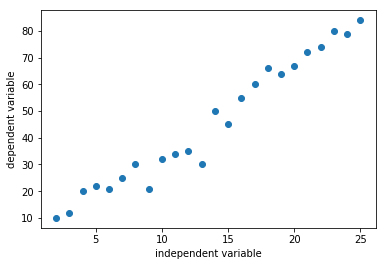

In [11]:
plt.scatter(xs,ys)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

# so we can see that dependent variable has a linear distribution with respect to independent variable

In [12]:
'''
now linear regression is a linear equation of line
y = mx + c where m is coefficient of independent variable and c is intercept. Befor going ahead and using sklearn to calculate linear 
model, lets explore the mathematics behind it using this two dimensional data
formula for coefficient or slope (m) :
(mean(x)*mean(y)-mean(x*y))/(mean(x)^2-mean(x^2))

formula for intercept (c) is: 
mean(y)-mean(x)*m

hence equation of line is : y= mx+c

'''

# lets write function for intercept and slope(coefficient)

def slope_intercept(x_val,y_val):
    x=np.array(x_val)
    y=np.array(y_val)
    m=( ( (np.mean(x)*np.mean(y)) - np.mean(x*y) ) /
       ((np.mean(x)*np.mean(x)) - np.mean(x*x))  )
    m=round(m,2)
    b=(np.mean(y) - np.mean(x)*m)
    b=round(b,2)
    
    return m,b



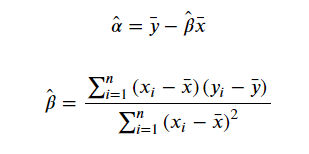

In [13]:
slope_intercept(xs,ys) # to see slope and intercept

(3.29, 0.92)

In [14]:
m,b=slope_intercept(xs,ys)

In [15]:
# eq of line 
reg_line=[(m*x)+b for x in xs]

In [16]:
# to calculate RMSE - root mean sqared error
'''
RMSE is a very common matrix to measure goodness of model, i.e how accurate our model is in predicting values.
Mathematics behind it is to draw a line of best fit in scattered data points so that that line has least error with respect to 
the actual data points. if Y is actual data point and Y is the predicted value by the equation of the line then error would be
= y-y_pred
but this has a bias towards sign as while adding positive and negative values would cancel each other and resultant error
would be less than the actual value. To overcome this, a general method is to take square which surves two purposes: 
1) Cancel out the effect of signs 
2) Penalize the error in prediction.

'''
def rmse(y1,y_hat):
    y_actual=np.array(y1)
    y_pred=np.array(y_hat)
    error=(y_actual-y_pred)**2
    error_mean=round(np.mean(error))
    err_sq=np.sqrt(error_mean)
    return err_sq

In [17]:
rmse(ys,reg_line)

4.58257569495584

In [18]:
# now we can proceed further to make a model in relatively big data set having more than one independent variables.
#Sklearn comes with many default data sets and that list can be seen by using 
#sklearn.datasets. # hit tab key

In [19]:
from sklearn.datasets import load_boston # getting the data, this data is about house price in boston area and its dependency on other variables

In [20]:
boston = load_boston()
type(boston)# to know the type of data

sklearn.utils.Bunch

In [21]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [60]:
# creating data frame

In [22]:
df_x=pd.DataFrame(boston.data,columns=boston.feature_names) # making a data frame for independent variables


In [23]:
df_y=pd.DataFrame(boston.target) # making data frame of dependent variable or target


In [24]:
df_x.head(13)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509  5.0  311.0   

    PTRATIO       B  LSTAT  
0      15.3  396.90   4.98  
1      17.8  396.90   9.14  
2      17.8  392.83   4.03  
3      18.7  394.63   2.94  
4      18.7  396.90   5.33  
5      18.7  394.12   5.21  
6      15.2  395.60  12.43  
7      15.2  396.90  19.15  
8      15.2  386.63  29.93  
9      15.2  386.71  17.10  
10     15.2  392.52  20.45  
11     15.2  396.90  13.27  
12     15.2  390.50  15.71

In [25]:
df_y.head(10)

0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2
5  28.7
6  22.9
7  27.1
8  16.5
9  18.9

In [26]:
df_x.describe() # this is a summary function

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

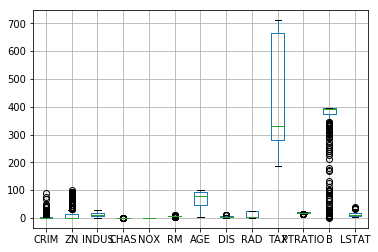

In [27]:
df_x.boxplot()

In [28]:
# checking null values column wise
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [43]:
df_x.shape # to know number of row and columns

(506, 13)

In [44]:
names=[i for i in list(df_x)] # to get list of column names
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

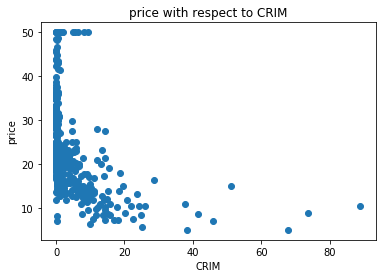

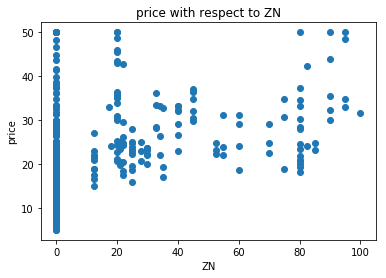

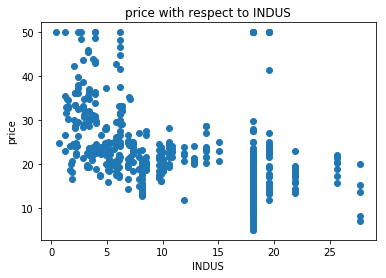

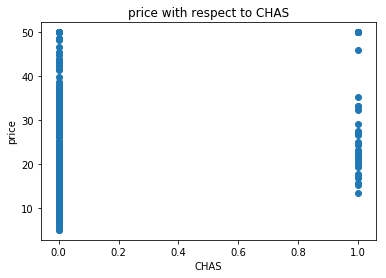

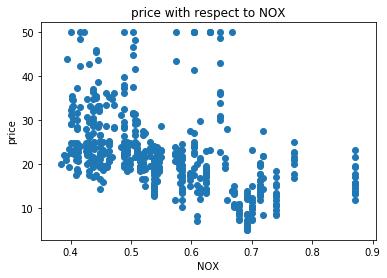

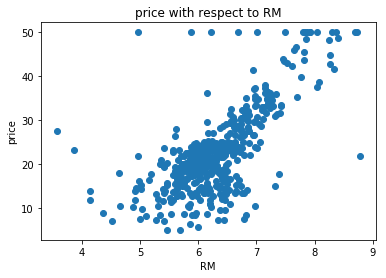

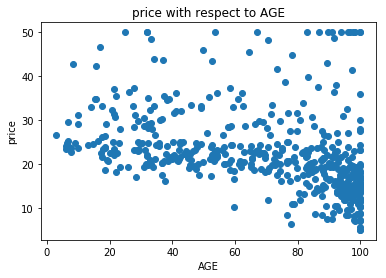

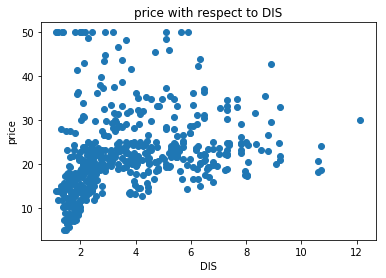

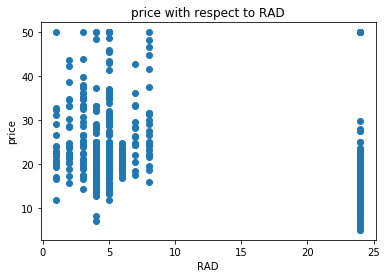

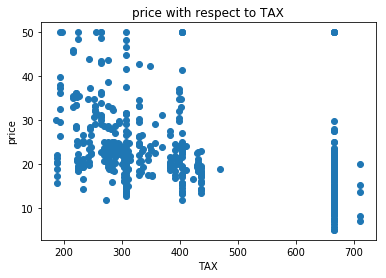

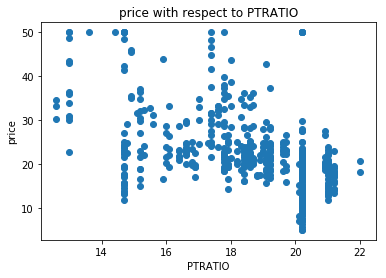

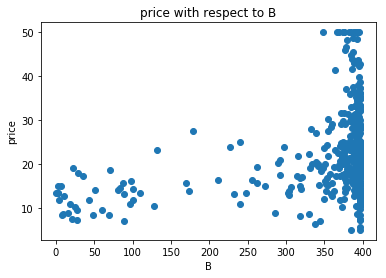

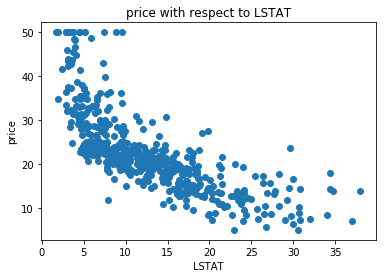

In [45]:
for i in names:
    plt.scatter(df_x[i],df_y)
    plt.xlabel(i)
    plt.ylabel("price")
    plt.title("price with respect to "+i)
    plt.show()
    # ploting effect on price by other variables separately

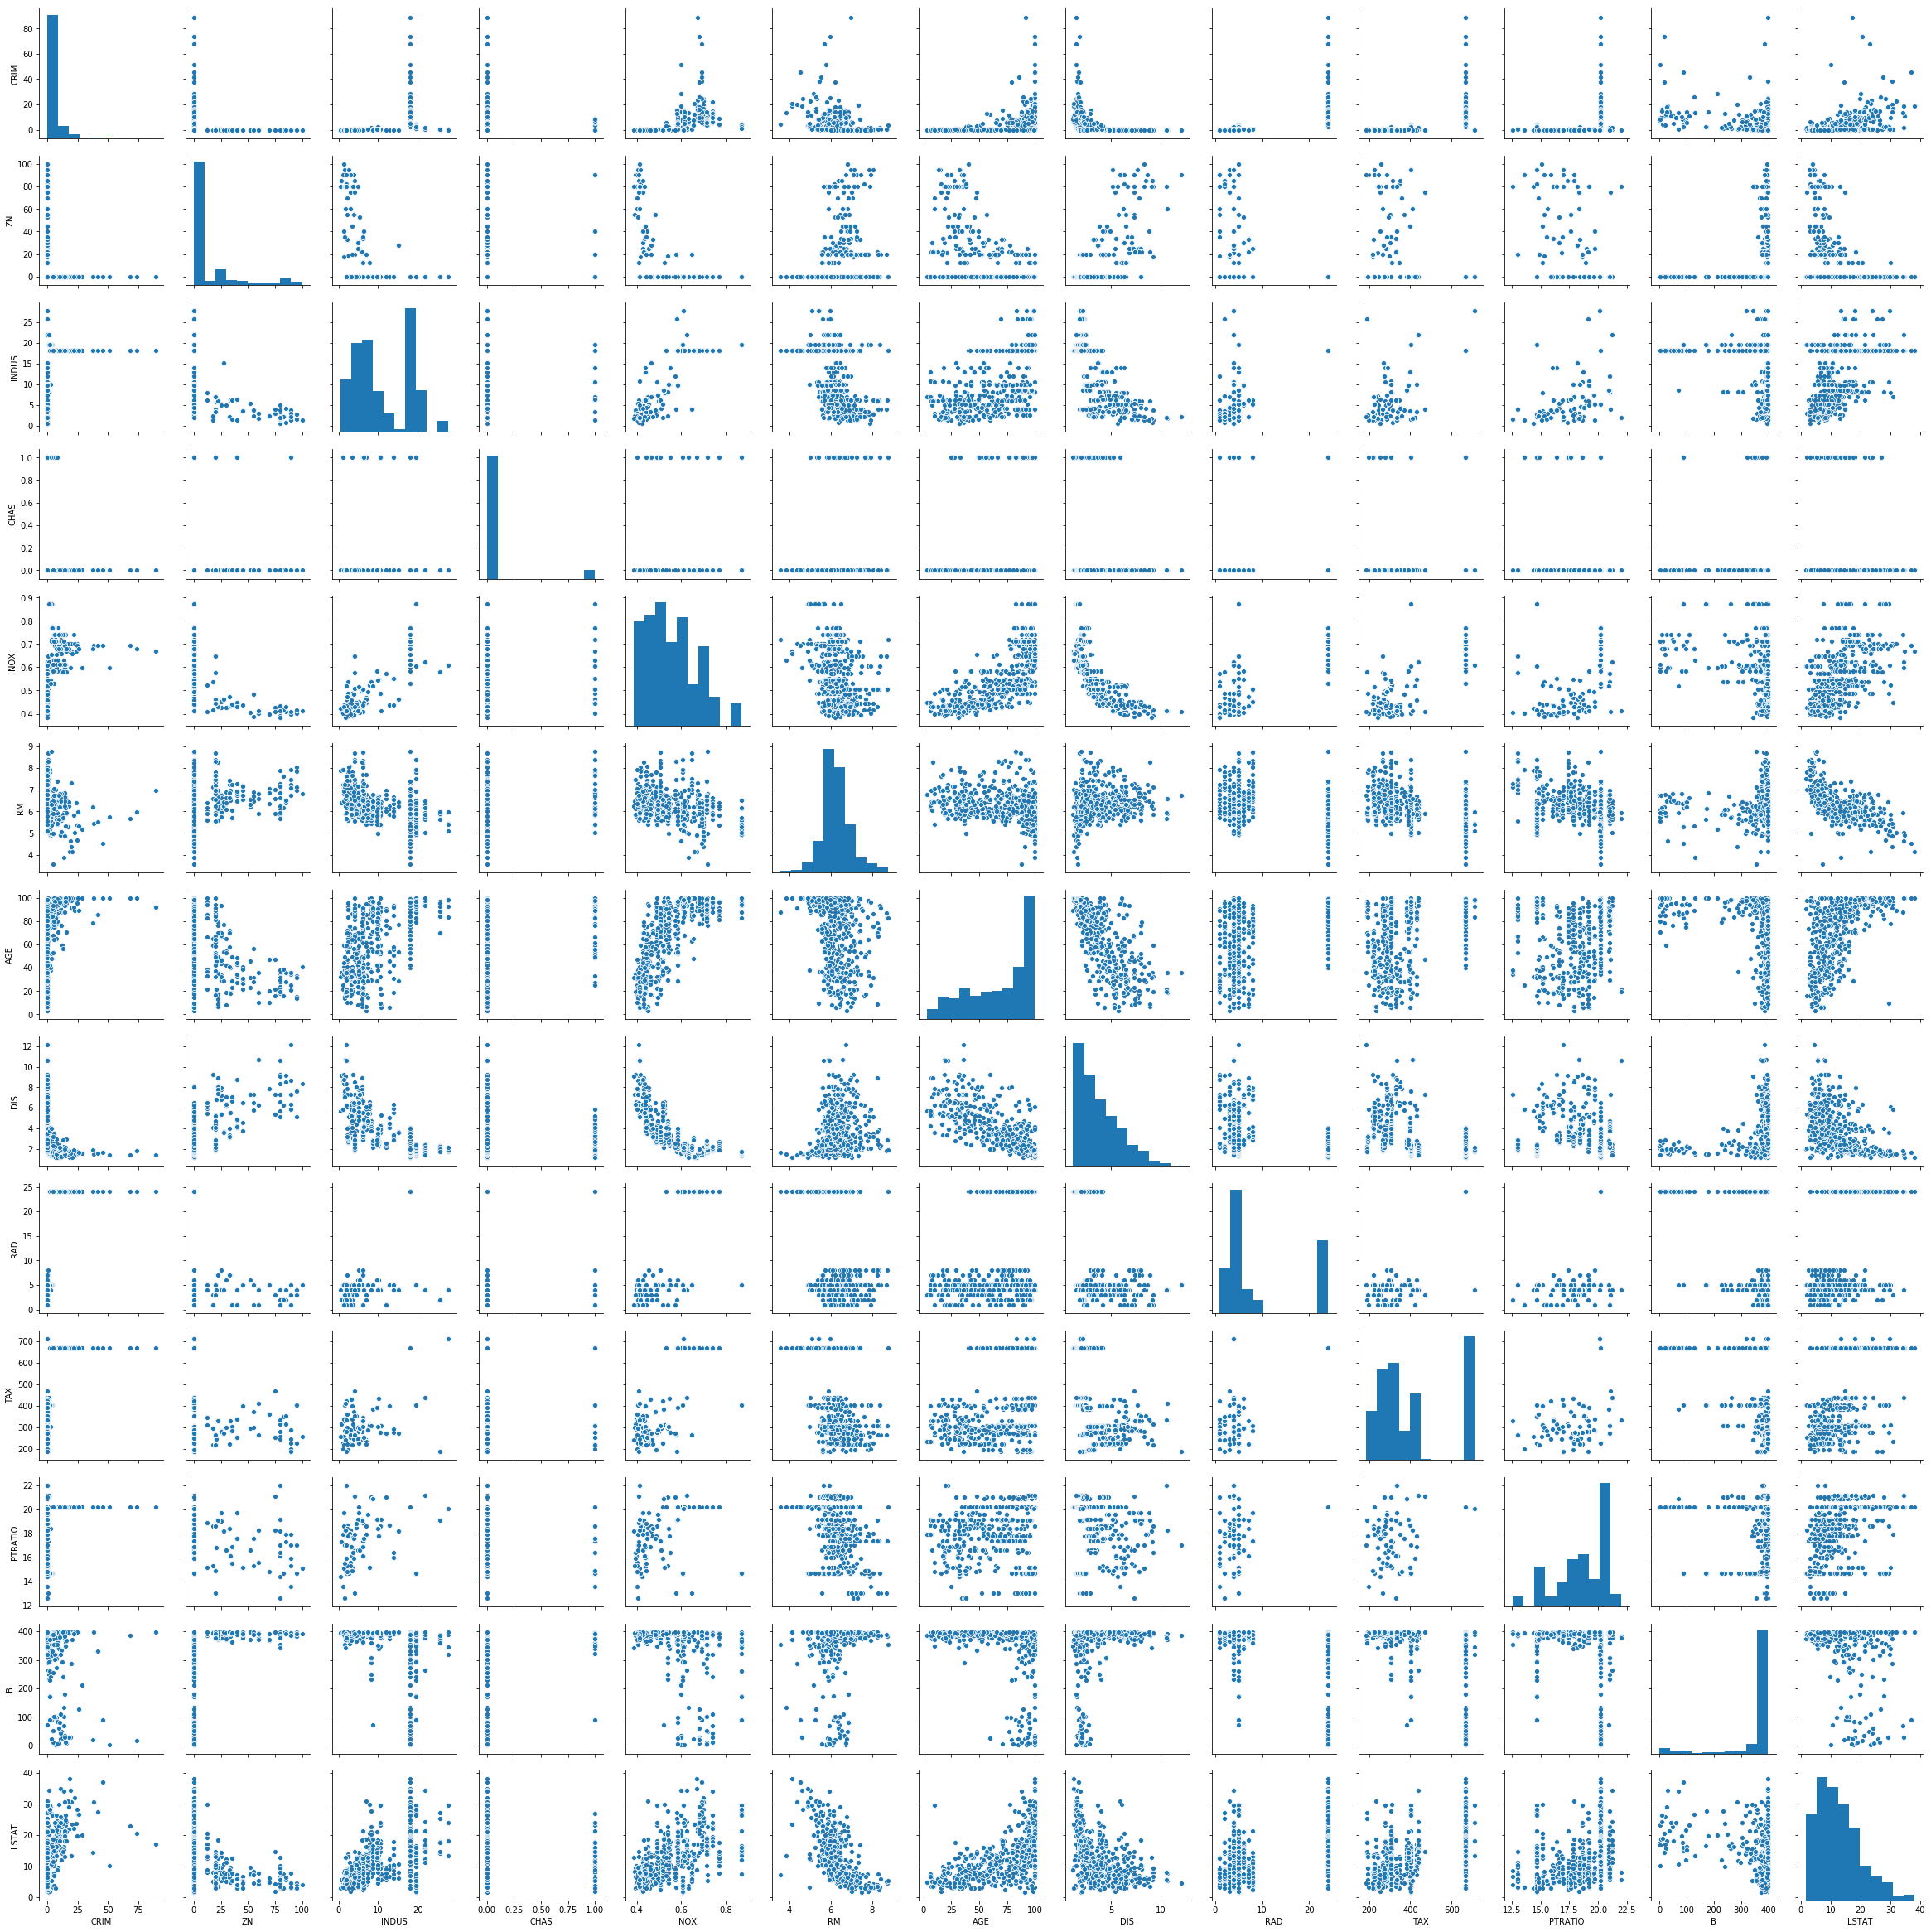

In [46]:
seaborn.pairplot(df_x)

--------------- CREATE A correlation plot ---------------


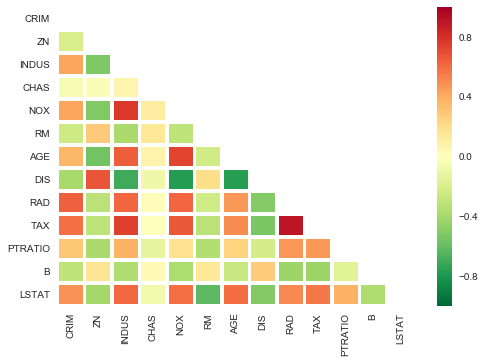

In [63]:
corr_df=x_train.corr(method='pearson')
print("--------------- CREATE A correlation plot ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [32]:
regr = linear_model.LinearRegression() # calling linear regression model


In [33]:
'''
This command is to split data in two parts i.e. train and test with test = 20 percent of total data
'''
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)


In [34]:
x_train.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
192  0.08664  45.0   3.44   0.0  0.437  7.178  26.3  6.4798  5.0  398.0   
138  0.24980   0.0  21.89   0.0  0.624  5.857  98.2  1.6686  4.0  437.0   
251  0.21409  22.0   5.86   0.0  0.431  6.438   8.9  7.3967  7.0  330.0   
13   0.62976   0.0   8.14   0.0  0.538  5.949  61.8  4.7075  4.0  307.0   
256  0.01538  90.0   3.75   0.0  0.394  7.454  34.2  6.3361  3.0  244.0   

     PTRATIO       B  LSTAT  
192     15.2  390.49   2.87  
138     21.2  392.04  21.32  
251     19.1  377.07   3.59  
13      21.0  396.90   8.26  
256     15.9  386.34   3.11

In [35]:
regr.fit(x_train,y_train) # making a linear regression model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
regr.intercept_

array([35.55487454])

In [37]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]
Mean squared error: 25.42
Variance score: 0.73


In [38]:
rmse(y_test,regr.predict(x_test)) # to calculate root mean square error

5.0

In [39]:
regr.intercept_ # to get intercept (c) for the regression line

array([35.55487454])

In [40]:
#output of reg.coef_ comes as array and to get all coefficients ou as list we can use this co
regr.coef_[0].tolist() # these are the coefficients of independent variables(slope)  'm' for the regression line

[-0.11596645190829982,
 0.047124923133630175,
 0.008259801462493445,
 3.234045310301079,
 -16.68658901913353,
 3.884106514652029,
 -0.010897444228720483,
 -1.5412954044120102,
 0.2932083087544864,
 -0.013405938287264751,
 -0.9062964291148622,
 0.008808234386811758,
 -0.45772384582139536]

In [41]:
len(regr.coef_[0].tolist())  # to see total number of coefficients

13

In [47]:
pd.DataFrame(zip(names,regr.coef_[0].tolist()),columns=["names","coefficient"]) # attaching slopes to respective independent variables

names  coefficient
0      CRIM    -0.115966
1        ZN     0.047125
2     INDUS     0.008260
3      CHAS     3.234045
4       NOX   -16.686589
5        RM     3.884107
6       AGE    -0.010897
7       DIS    -1.541295
8       RAD     0.293208
9       TAX    -0.013406
10  PTRATIO    -0.906296
11        B     0.008808
12    LSTAT    -0.457724

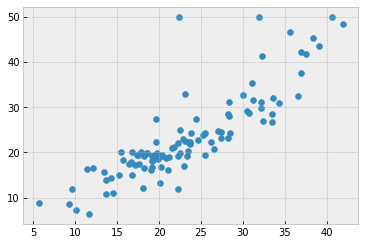

In [48]:
style.use("bmh")
plt.scatter(regr.predict(x_test),y_test)
plt.show()

In [31]:
 ## additional informations- matplotlib comes with many default styles in which a plot can be plotted and it can be seen as 
#style.available 
# to use this just add a line in plot- style.use("name of style")


## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between IV and price (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between IV ads and price (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)


Note that we generally ignore the p-value for the intercept.

In [29]:
# to find importance of variables in model and select only important variables for the model
'''
Sklearn is a good way to plot a linear regression but if we are considering linear regression for a modelling then apart from 
the equation of line it is very important to know the importance of variables (significance) with respect to the hypothesis
For testing this we calculate P value for each variable and if it is less than the desired cutoff( 0.05 is a general cutoff
for 95% significance) then we can say with confidence that a variable is significance
To test this, python as another library 'statsmodels' which is precisely for statistical modelling and in that we can have 
summary of the model to see p values and significance of variables
'''
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [49]:
model1=sm.OLS(y_train,x_train) # ordianry least square method ( or linear least square) is a general approach for linear regression and we have covered the theory of this in the first segment of this tutorial 

In [50]:
result=model1.fit()

In [51]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     712.2
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          7.58e-263
Time:                        07:36:10   Log-Likelihood:                -1210.7
No. Observations:                 404   AIC:                             2447.
Df Residuals:                     391   BIC:                             2499.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1096      0.039     -2.815      0.0

In [52]:
result.conf_int()

0         1
CRIM    -0.186093 -0.033049
ZN       0.016232  0.080680
INDUS   -0.167482  0.120236
CHAS     0.901484  5.075336
NOX     -9.346069  5.046996
RM       5.297361  6.629665
AGE     -0.047386  0.013405
DIS     -1.461468 -0.595050
RAD      0.021508  0.314558
TAX     -0.019146 -0.001787
PTRATIO -0.619455 -0.130641
B        0.008238  0.020084
LSTAT   -0.456435 -0.234129

In [54]:
result.pvalues

CRIM       5.121839e-03
ZN         3.301637e-03
INDUS      7.469894e-01
CHAS       5.119476e-03
NOX        5.573811e-01
RM         1.743349e-51
AGE        2.724451e-01
DIS        4.213249e-06
RAD        2.470853e-02
TAX        1.822748e-02
PTRATIO    2.720333e-03
B          3.604077e-06
LSTAT      2.447526e-09
dtype: float64

# Assumptions of Linear Regression

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  The regression has five key assumptions:

   * Linear relationship
   * Multivariate normality (The error terms must be normally distributed)
   * No or little multicollinearity
   * No auto-correlation
   * Homoscedasticity
 
A note about sample size.  In Linear regression the sample size rule of thumb is that the Regression analysis requires at least 20 cases per independent variable in the analysis.

Primarily, linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots


Secondly, the linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram or a Q-Q-Plot.  Normality can be checked with a goodness of fit test, e.g., the Kolmogorov-Smirnov test.  When the data is not normally distributed a non-linear transformation (e.g., log-transformation) might fix this issue.


Thirdly, linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.
Multicollinearity may be tested with three central criteria:


   1. Correlation matrix – When computing the matrix of Pearson's Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.

   2. Tolerance – The tolerance measures the influence of one independent variable on all other independent variables; the tolerance is calculated with an initial linear regression analysis.  Tolerance is defined as T = 1 – R² for these first step regression analysis.  With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.

   3. Variance Inflation Factor (VIF) – the variance inflation factor of the linear regression is defined as VIF = 1/T. With VIF > 10 there is an indication that multicollinearity may be present; with VIF > 100 there is certainly multicollinearity among the variables.


If multicollinearity is found in the data, centering the data (that is deducting the mean of the variable from each score) might help in solving the problem.  However, the simplest way to address the problem is to remove independent variables with high VIF values.

Fourth, linear regression analysis requires that there is little or no autocorrelation in the data.  Autocorrelation occurs when the residuals are not independent from each other.  For instance, this typically occurs in stock prices, where the price is not independent from the previous price.


The last assumption of the linear regression analysis is homoscedasticity.  The scatter plot is a good way to check whether the data is homoscedastic (meaning the residuals are equal across the regression line).  The following scatter plots show examples of data that are not homoscedastic (i.e., heteroscedastic):


The Goldfeld-Quandt Test can also be used to test heteroscedasticity.  The test splits the data into two groups and tests to see if the variances of the residuals are similar across the groups.  If homoscedasticity is present, a non-linear correction might fix the problem.

In [58]:
# we can drop few variables and select only those who have a p values < 0.5. Then we can check the improvement in model
# To compare two different models, a general approach is AIC- Akaike information criteria and the model with minimum AIC is the best
# One important this regarding AIC is that it compares similar models only- we can't compare regression with logistic regression model
model2=sm.OLS(y_train,x_train[['CRIM','ZN','CHAS','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     926.9
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          9.80e-267
Time:                        07:53:55   Log-Likelihood:                -1212.0
No. Observations:                 404   AIC:                             2444.
Df Residuals:                     394   BIC:                             2484.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1059      0.039     -2.731      0.0

# Durbin-Watson
#r takes the value 0 from the equation 2*(1-r),which in turn tells us that the residuals are not correlated.
#Durbin-Watson’s d tests the null hypothesis that the residuals are not linearly auto-correlated.  
 #While d can assume values between 0 and 4, values around 2 indicate no autocorrelation.
#As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data. 

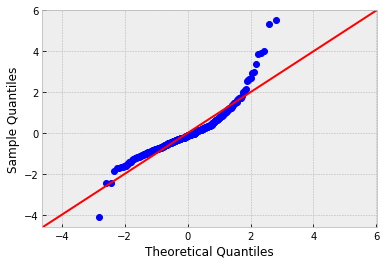

In [59]:
## residuals normally distributed
res=result2.resid
fig_res=sm.qqplot(res,fit='True',line='45')

''' 
Further improvements
A very important concept which comes in play with almost all types of statistical models is 'Multicollinearity'
It is the correlation between two independent variables and thus interaction of those cause an impact on the relation between
variables and thus the model.
To check this, we need to find correlation between the independent variables and that can be done by this command
corr(method="name of method")

To see that as a visualization, we can make a correlation plot using seaborn ( another python library for plots) and it 
along with matplotlib,numpy,statsmodels,pandas comes in anaconda distribution
'''


In [ ]:
# since it is pearson coeffcient for correlation hence a values near to 1 or -1 would be showing high correlation.
# example AGE and DIS - we can drop either of these two variables and then re run the model to see if there is any improvement also we can create a new feature by taking the ratio or some other arithmatic function.
# in this way we deal correlation issues between dependent variables

